# Examine $\xi$ near oscillating stability results

In a previous examination of the $\xi$ near oscilatting kink stability regions I found that the oscillations were caused by singularties in the value of $\delta$. Because the value of $\xi$ went to zero. 
Removing the singularity by multiplying by the positive definite term $\xi^2$ removed some of the oscillations in stability values but not all.


![less oscillations](less_oscillation.png)

In [248]:
#imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import sys
sys.path.append('..')
sys.path.append('../scipy_mod')
sys.path.append('../../../provenance_scripts/')

import numpy as np
from scipy.interpolate import splev

import equil_solver as es
import newcomb_simple as new
reload(new)

from copy import deepcopy

# Run with current program

In [249]:
import skin_core_scanner_simple as scss
import lambda_k_plotting_simple as plot

In [250]:
lambda_a_mesh, k_a_mesh, stability_maps = scss.scan_lambda_k_space([0.01, 3.0, 25.], [0.01, 1.5, 25], epsilon=1.0,
                         core_radius_norm=0.7, transition_width_norm=0.1, skin_width_norm=0.1, method='lsoda')

lambda_bar = 0.010
lambda_bar = 0.135
lambda_bar = 0.259
lambda_bar = 0.384
lambda_bar = 0.508
lambda_bar = 0.633
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.445.
lambda_bar = 0.758
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.445.
lambda_bar = 0.882
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.507.
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.569.
Integration to plasma edge did not succeed. Can not determine external stability at k = 0.631.
lambda_bar = 1.007
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.569.
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.631.
Last singularity is suydam unstable. Unable to deterime external instability at k = 0.693.
lambda_bar = 1.131
Last singularity is suydam unstable. Unable to deterime external instability a

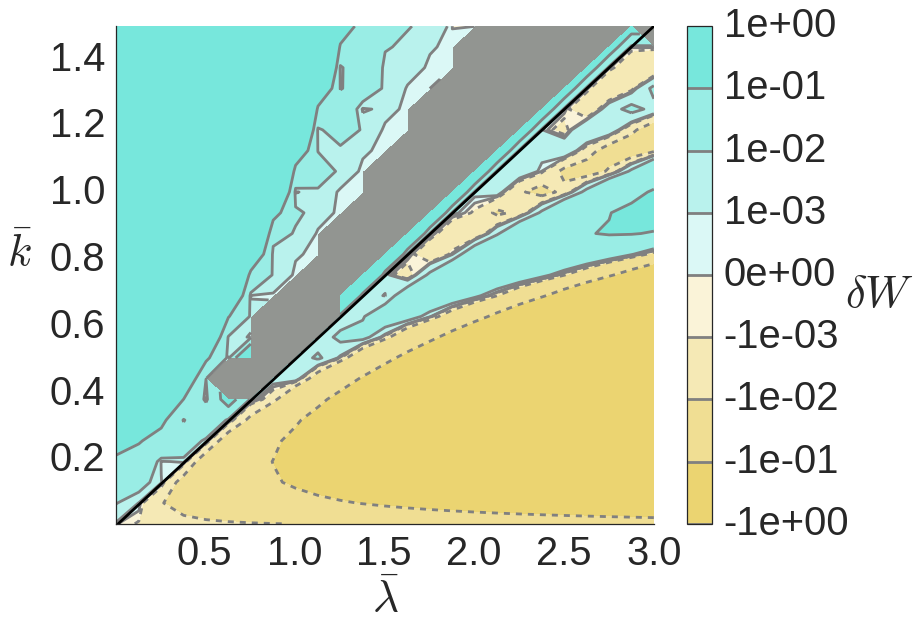

In [214]:
plot.plot_lambda_k_space_dw('../../output/2016-01-18-09-54/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_neg_1', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=False)

# Now I will calculate the stability of points along the $\bar{\lambda}=2.87$ line.

In [19]:
print 'lambda', np.linspace(0.01, 3.0, 25.)
print 'k', np.linspace(0.01, 1.5, 25)

lambda [ 0.01        0.13458333  0.25916667  0.38375     0.50833333  0.63291667
  0.7575      0.88208333  1.00666667  1.13125     1.25583333  1.38041667
  1.505       1.62958333  1.75416667  1.87875     2.00333333  2.12791667
  2.2525      2.37708333  2.50166667  2.62625     2.75083333  2.87541667
  3.        ]
k [ 0.01        0.07208333  0.13416667  0.19625     0.25833333  0.32041667
  0.3825      0.44458333  0.50666667  0.56875     0.63083333  0.69291667
  0.755       0.81708333  0.87916667  0.94125     1.00333333  1.06541667
  1.1275      1.18958333  1.25166667  1.31375     1.37583333  1.43791667
  1.5       ]


In [238]:
k_bars = np.linspace(0.01, 1.5, 25)[9:]
print k_bars

[ 0.56875     0.63083333  0.69291667  0.755       0.81708333  0.87916667
  0.94125     1.00333333  1.06541667  1.1275      1.18958333  1.25166667
  1.31375     1.37583333  1.43791667  1.5       ]


## Set up parameters

In [251]:
#parameters
lambda_bar = 2.87
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-10
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-2
max_step = 1e-2
nsteps = 1e3
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = False
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 20,
                  'points_transition': 20,
                  'core_radius_norm': 0.7,
                  'transition_width_norm': 0.1,
                  'skin_width_norm': 0.1}

In [253]:
#create profile and determine external stability

results = []
params_list = []
for k_bar in k_bars:
    params['k'] = k_bar
    profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                          lambda_bar=lambda_bar,
                                          **profile_kwargs)
    params_wo_splines = deepcopy(params)
    params.update(profile.get_tck_splines())
    params.update({'xi_factor': xi_factor,
                   'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
                   'beta_0': profile.beta_0(),
                   'core_radius': profile.core_radius,
                   'transition_width': profile.transition_width,
                   'skin_width': profile.skin_width,
                   'epsilon': profile.epsilon})

    params_list.append(deepcopy(params))
    result  = new.stability(params, offset, suydam_end_offset,
                            sing_search_points=sing_search_points,
                            suppress_output=suppress_output,
                            xi_given=init_value,
                            nsteps=nsteps, 
                            method=method,
                            diagnose=True)
    results.append(result)

Integration to plasma edge did not succeed. Can not determine external stability at k = 1.438.
Integration to plasma edge did not succeed. Can not determine external stability at k = 1.500.


### $\xi_a$

In [254]:
for result in results:
    print result[4][-1]

0.587809036191
0.461795191489
0.315986142177
0.15325458458
-0.0197939873545
-0.191086349306
-0.341010519254
-0.440827733999
-0.453040833817
-0.338054647722
-0.0746633917287
0.292394229589
0.564592854578
0.246282850534
nan
nan


### $\xi'_a$

In [255]:
for result in results:
    print result[5][-1]

-1.13612098736
-1.51576813453
-1.96249951593
-2.46275919711
-2.98197797534
-3.4509261568
-3.74541846876
-3.660969747
-2.88733810002
-1.01126588018
2.37349611681
7.19144443624
11.0178348973
-4.13803703096
nan
nan


$\delta W$

Just as in the contour plot we see that there is a unstable region followed by a stable, unstable region, stable, unstable and undetermined region.

In [220]:
for result in results:
    print result[2]

-2.54917008744
-1.91009269469
-1.19563625521
-0.504545488398
0.0531372028394
0.382004469404
0.439881711417
0.276800928143
0.0431908913695
-0.0778306380837
-0.0229079919368
0.0504845422085
-0.012248735949
-0.0184659332113
None
None


### Plot the $\xi$ and $\xi'$ functions

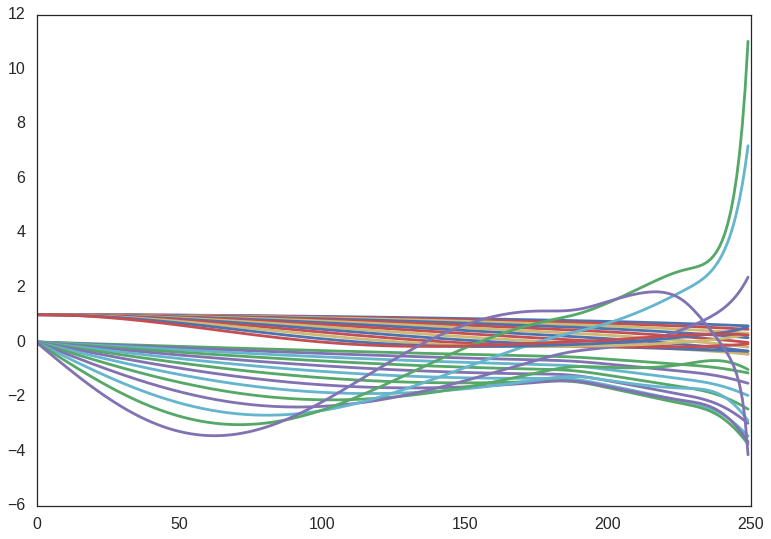

In [221]:
for result in results[0:14]:
    plt.plot(result[4])
    plt.plot(result[5])

### Plot the $\xi$ and $\xi'$ functions which do not become large

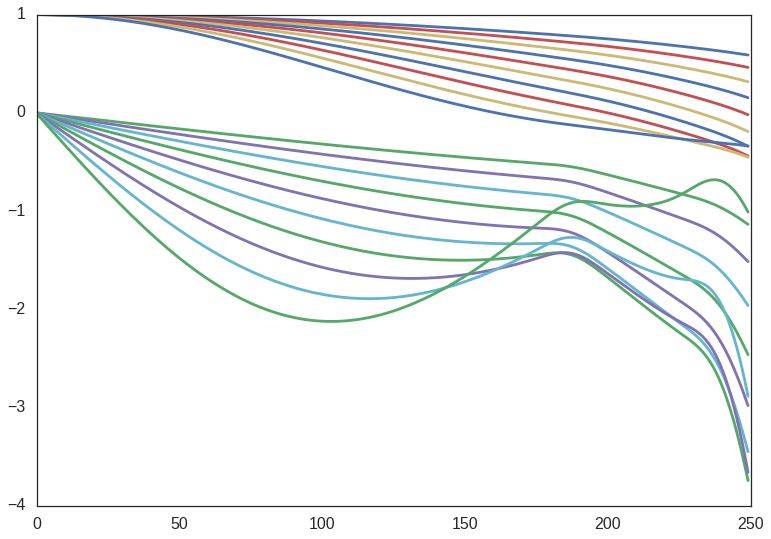

In [222]:
for result in results[0:10]:
    plt.plot(result[4])
    plt.plot(result[5])

### Plot the $\xi$ and $\xi'$ for first unstable region

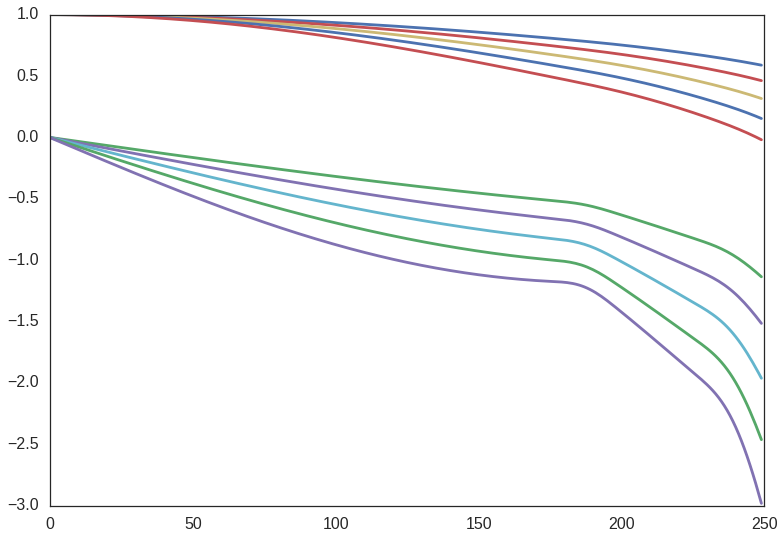

In [223]:
for i in [0, 1, 2, 3, 4]:
    result = results[i]
    plt.plot(result[4])
    plt.plot(result[5])

### Plot the $\xi$ and $\xi'$ for first stable region

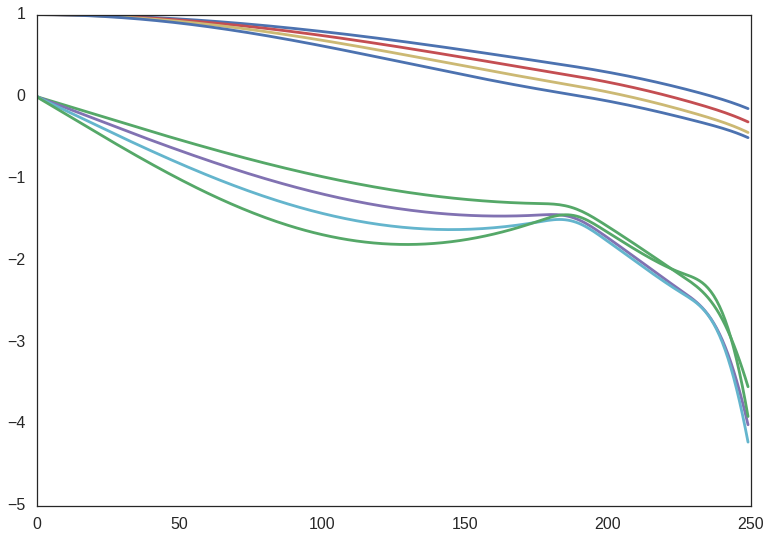

In [122]:
for i in [5, 6, 7, 8]:
    result = results[i]
    plt.plot(result[4])
    plt.plot(result[5])

## Profiles are the same since $\bar{\lambda}$ and $epsilon$ are constant change in $k$ only changes $q$ profile.

0.56875
0.396341463415
0.630833333333
0.439605110337
0.692916666667
0.482868757259
0.755
0.526132404181
0.817083333333
0.569396051103
0.879166666667
0.612659698026
0.94125
0.655923344948
1.00333333333
0.69918699187
1.06541666667
0.742450638792
1.1275
0.785714285714
1.18958333333
0.828977932636
1.25166666667
0.872241579559
1.31375
0.915505226481
1.37583333333
0.958768873403
1.43791666667
1.00203252033
1.5
1.04529616725


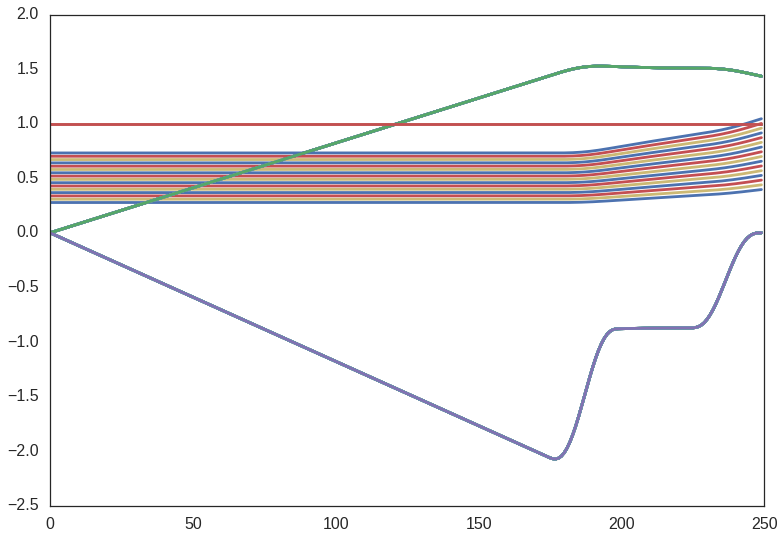

In [258]:
for params in params_list:
    print params['k']
    print splev(1, params['q'])
    r = np.linspace(0, 1, 250)
    plt.plot(splev(r, params['q']))
    plt.plot(splev(r, params['b_theta']))
    plt.plot(splev(r, params['b_z']))
    plt.plot(splev(r, params['p_prime']))

# Look at f and g profiles

In [196]:
import newcomb_f
reload(newcomb_f)
import newcomb_g
reload(newcomb_g)

from newcomb_f import newcomb_f_16 as f_func
from newcomb_g import newcomb_g_18_dimless_wo_q as g_func

# f profiles

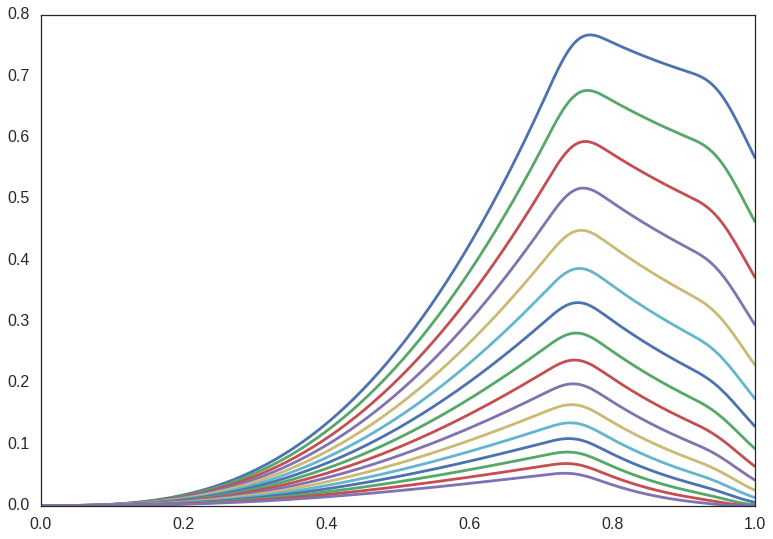

In [197]:
for params in params_list:
    r = np.linspace(0, 1, 250)

    b_theta = splev(r, params['b_theta'])
    b_z = splev(r, params['b_z'])
    
    plt.plot(r, f_func(r, params['k'], params['m'], b_z, b_theta))


# g profiles

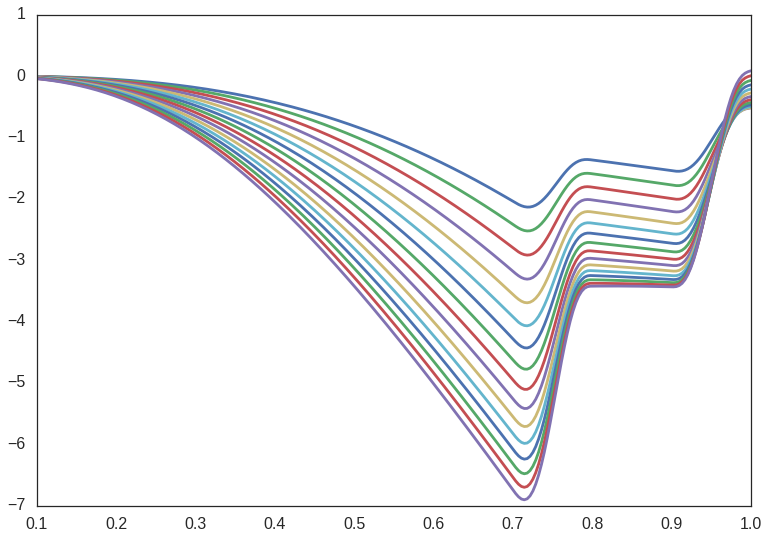

In [198]:
for params in params_list:
    r = np.linspace(0.1, 1, 250)

    b_theta = splev(r, params['b_theta'])
    b_z = splev(r, params['b_z'])
    p_prime = splev(r, params['p_prime'])
    g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0'])
    plt.plot(r, g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0']))


### g profiles for unstable region

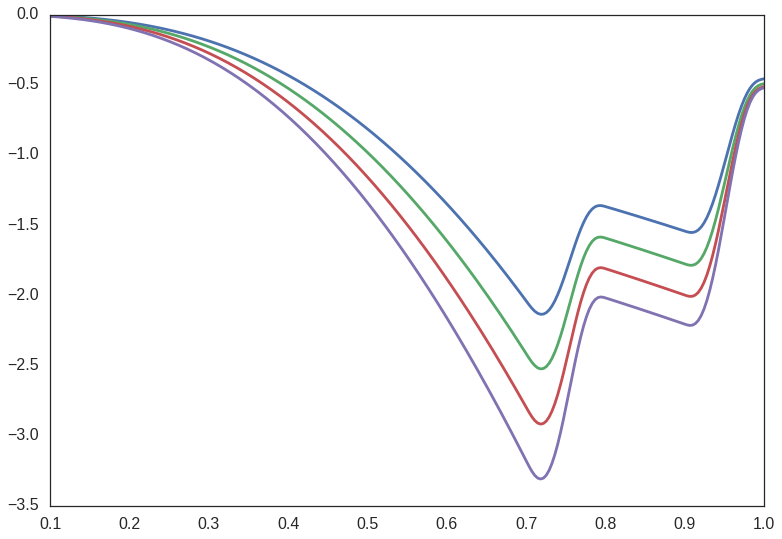

In [199]:
for params in params_list[0:4]:
    r = np.linspace(0.1, 1, 250)

    b_theta = splev(r, params['b_theta'])
    b_z = splev(r, params['b_z'])
    p_prime = splev(r, params['p_prime'])
    g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0'])
    plt.plot(r, g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0']))


### g profiles for stable region

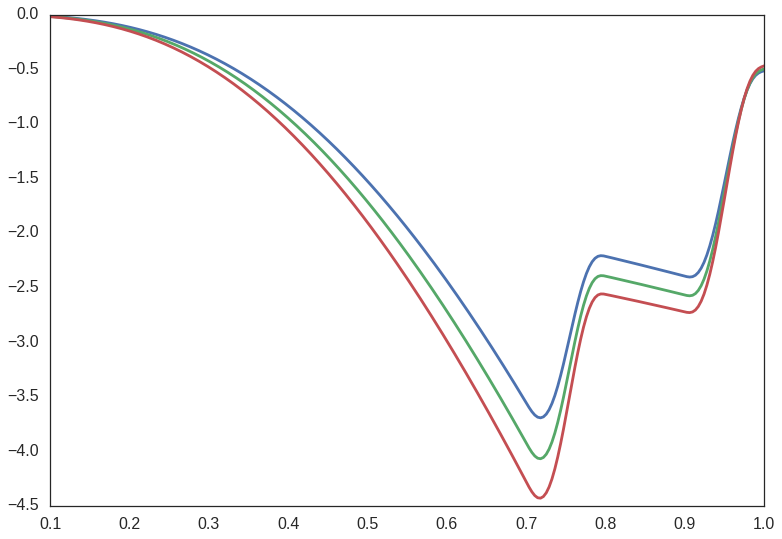

In [200]:
for params in params_list[4:7]:
    r = np.linspace(0.1, 1, 250)

    b_theta = splev(r, params['b_theta'])
    b_z = splev(r, params['b_z'])
    p_prime = splev(r, params['p_prime'])
    g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0'])
    plt.plot(r, g_func(r, params['k'], params['m'], b_z, b_theta, p_prime, params['beta_0']))

There does not seem to be anything wrong with the integrations. The change in bheaviour of the $\xi$, $\xi'$ fuctions is due to a change in g due a different weigthing of the terms as k changes.